# Part 1 - Targeted Marketing with Customer Segmentation and RFM Analysis 

by Hyder Ali

An eCommerce business wants to identify customers before they become inactive. Knowing which customers are moving from active to inactive will help the eCommerce business create targeted marketing to keep customers active with incentives.

In Part 1, we will segment customers based on their Recency, Frequency, and Monetary Value (RFM) to identify how active or inactive they are.  RFM analysis is a technique used to identify how recently a customer has purchased (recency), how often a customer purchases (frequency), and how much money a customer spends (monetary value).

Calculating RFM will provide two things:
(1) provide a foundation to segment customers based on their purchase activity and
(2) identify high-value customers

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('data/Online Retail.xlsx', sheet_name = 'Online Retail')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
print("The data size is : ", data.shape)
print("There are %s customers" % len(set(data.CustomerID)))

The data size is :  (541909, 8)
There are 139452 customers


In [4]:
# Drop NaN in Customer ID Columns
data.dropna(subset = ['CustomerID'], inplace = True)

print("After removing Customer.ID misssing values, the data size is : ", data.shape)
print("There are %s customers" % len(set(data.CustomerID)))

After removing Customer.ID misssing values, the data size is :  (406829, 8)
There are 4372 customers


The raw data has close to 550,000 transactions with over 4,000 customers. After inspecting the data, some transactions have been removed. 

A portion of transaction data are missing *CustomerID*. *CustomerID* is required for this segmentation - these transaction will be removed from the data set. 2% of transactions are item returns. For this demonstration, transaction returns are removed, but the initial transaction will remain in the dataset to maintain *Recency* and *Frequency* for all customers.

After removing missing value and return transactions there are close to 400,000 transactions remaining.

## Customer Segmentation on Recency Value

The business goal is to create targeted marketing and contact customers before they move to a lower segment. Therefore, the time range for *Active, Warm, Cold, and Inactive* segments should be selected to best capture customers’ purchase behavior.

This time range selection will be a starting point, but keep in mind that segmentation time ranges should change over time based on gathering more transaction data, marketing campaign performance, and business goal changes. Moreover, we will be focusing on the latest customer transactional data in 2011.

In [5]:
# Create year column
data['InvoiceDateYear'] = data['InvoiceDate'].dt.year
print("The data contains across years: %s" % set(data.InvoiceDateYear))

The data contains across years: {2010, 2011}


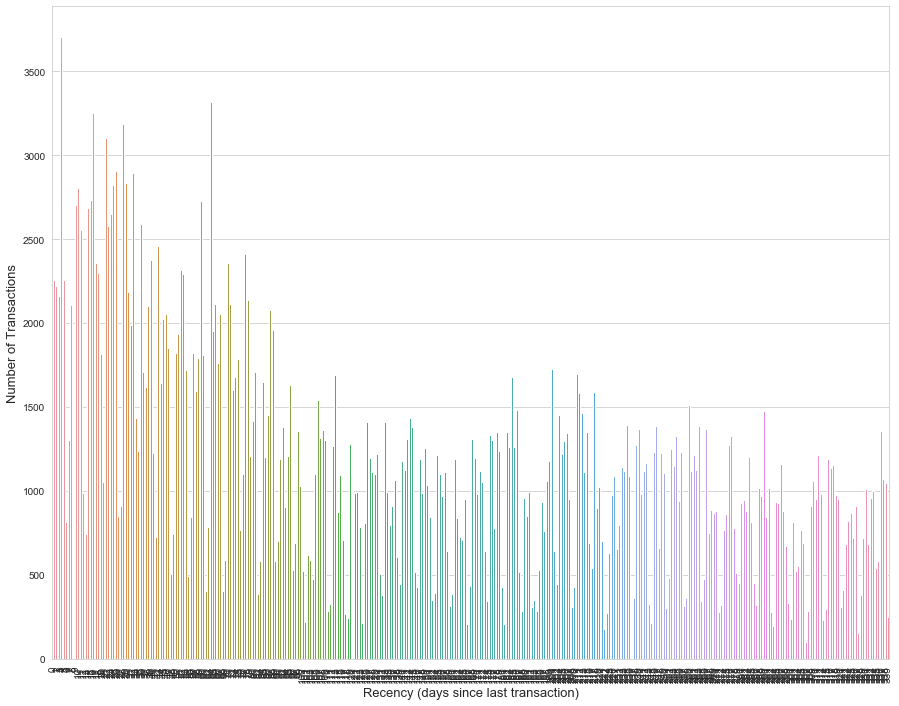

In [6]:
# Using year 2011 as the baseline to identify the segment values
data_2011 = data[data['InvoiceDateYear'] == 2011]
data_2011['DaysSinceLastTransaction'] = (max(data_2011['InvoiceDate']) - data_2011['InvoiceDate']).dt.days

grouped_2011 = data_2011.groupby('DaysSinceLastTransaction')['InvoiceNo'].aggregate("count")

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped_2011.index, grouped_2011.values)

plt.ylabel('Number of Transactions', fontsize=13)
plt.xlabel('Recency (days since last transaction)', fontsize=13)
plt.show()

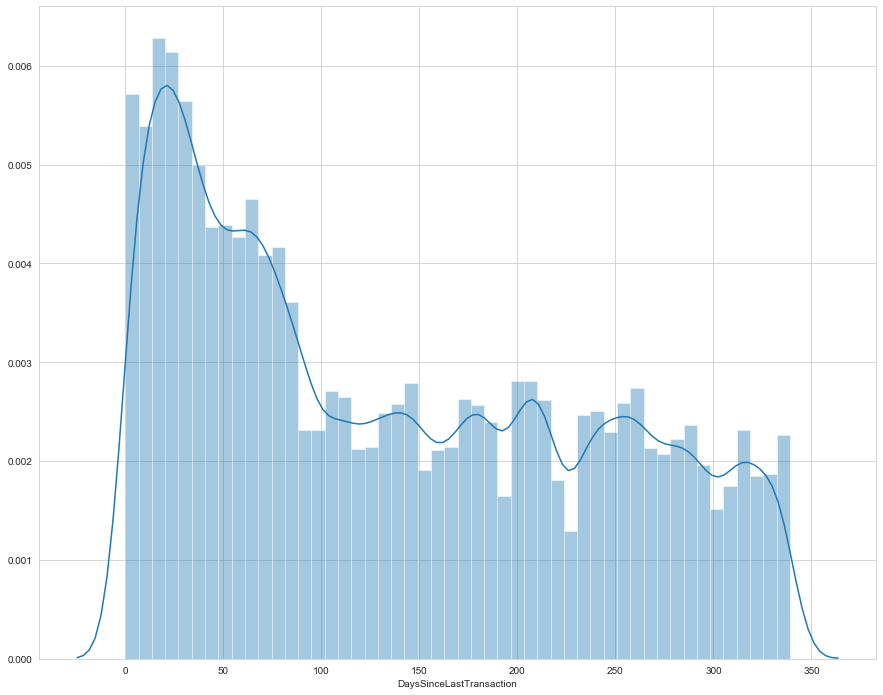

In [7]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
sns.distplot(data_2011['DaysSinceLastTransaction'])

Based on visual analysis of the above plots for *DaysSinceLastTransaction*, the following points were seleccted with the goal of capturing within a group before the density trends downward (blue line starts to go down).

Each segment is defined as the following:
- *Active* = Recency (days since last purchase) is equal to or less than 30 days
- *Warm* = Recency (days since last purchase) is between 31 and 100 days
- *Cold* = Recency (days since last purchase) is between 101 and 215 days
- *Inactive* = Recency (days since last purchase) is more than 215 days

Next, we proceed to segment all customers (2010 to 2011) by how recent they made a purchase over a year, with defined time ranges for each segment.

In [8]:
# function to segment Recency values
def recencySegmentation (vals):
    if vals <= 30:
        return "Active"
    elif vals <= 100:
        return "Warm"
    elif vals <= 215:
        return "Cold"
    else:
        return "Inactive"

In [15]:
data_2011['DaysSinceLastTransaction'] = (max(data_2011['InvoiceDate']) - data_2011['InvoiceDate']).dt.days
grouped_2011 = data_2011.groupby('CustomerID').aggregate({'DaysSinceLastTransaction': 'max'}).reset_index()
grouped_2011['RecencySegments'] = grouped_2011['DaysSinceLastTransaction'].apply(recencySegmentation)
grouped_2011.head()

,CustomerID,DaysSinceLastTransaction,RecencySegments
0,12346.0,325,Inactive
1,12347.0,316,Inactive
2,12348.0,318,Inactive
3,12349.0,18,Active
4,12350.0,309,Inactive


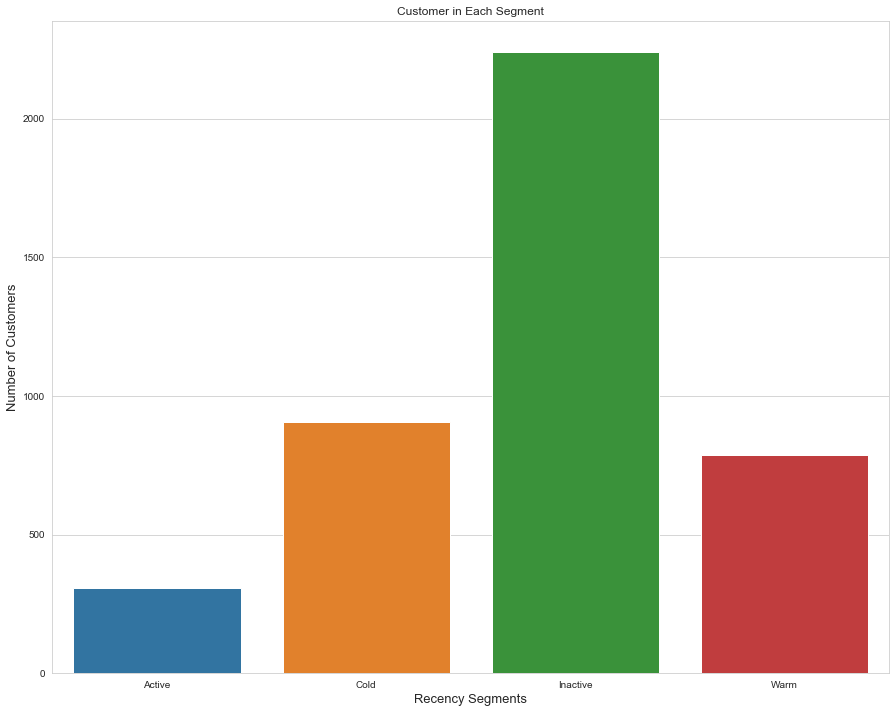

In [18]:
grouped_recency_segments = grouped_2011.groupby('RecencySegments')['CustomerID'].aggregate("count")

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='horizontal')
sns.barplot(grouped_recency_segments.index, grouped_recency_segments.values)

plt.title("Customer in Each Segment")
plt.ylabel('Number of Customers', fontsize=13)
plt.xlabel('Recency Segments', fontsize=13)
plt.show()

With all customers identified by segment, the eCommerce business can now create an action plan to target customers who are close to moving to lower segments.

Further Considerations:
- Customer segmentation time ranges should be adjusted based on a balance of business goals, customer purchasing behavior, and marketing performance. The right balance can be found with more transaction data and monitoring and adjusting targeted marketing performance over time.
- Segments can be split by customer value, such as Active High Value or Warm Low Value. Segmenting by value gives the business finer control of messages to customers, where they can offer promotions that are within customer spending habits. Knowing each customer value also helps the business create targeted marketing for high-value customers.